# 案例2: 构建自己的多层感知机: MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## 读入MNIST数据集

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [4]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## 超参数设置

In [5]:
batch_size = 128   # 64 , 128 , 256
max_epoch = 50
init_std = 0.02

learning_rate_SGD = 0.01   # 0.0001 , 0.001 , 0.01
weight_decay = 0.005

disp_freq = 50

## 1. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.
### TODO
执行以下代码之前，请完成 **./optimizer.py** 和 **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.

### TODO
执行以下代码之前，请完成 **layers/fc_layer.py** 和 **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
Epoch [0][50]	 Batch [0][429]	 Training Loss 4.7274	 Accuracy 0.1016
Epoch [0][50]	 Batch [50][429]	 Training Loss 0.6002	 Accuracy 0.1501
Epoch [0][50]	 Batch [100][429]	 Training Loss 0.5183	 A

Epoch [9][50]	 Batch [100][429]	 Training Loss 0.1620	 Accuracy 0.8545
Epoch [9][50]	 Batch [150][429]	 Training Loss 0.1667	 Accuracy 0.8448
Epoch [9][50]	 Batch [200][429]	 Training Loss 0.1659	 Accuracy 0.8467
Epoch [9][50]	 Batch [250][429]	 Training Loss 0.1665	 Accuracy 0.8459
Epoch [9][50]	 Batch [300][429]	 Training Loss 0.1670	 Accuracy 0.8457
Epoch [9][50]	 Batch [350][429]	 Training Loss 0.1672	 Accuracy 0.8456
Epoch [9][50]	 Batch [400][429]	 Training Loss 0.1675	 Accuracy 0.8452

Epoch [9]	 Average training loss 0.1671	 Average training accuracy 0.8458
Epoch [9]	 Average validation loss 0.1457	 Average validation accuracy 0.8874

Epoch [10][50]	 Batch [0][429]	 Training Loss 0.1506	 Accuracy 0.8750
Epoch [10][50]	 Batch [50][429]	 Training Loss 0.1593	 Accuracy 0.8566
Epoch [10][50]	 Batch [100][429]	 Training Loss 0.1593	 Accuracy 0.8576
Epoch [10][50]	 Batch [150][429]	 Training Loss 0.1640	 Accuracy 0.8476
Epoch [10][50]	 Batch [200][429]	 Training Loss 0.1632	 Accuracy

Epoch [19][50]	 Batch [300][429]	 Training Loss 0.1522	 Accuracy 0.8638
Epoch [19][50]	 Batch [350][429]	 Training Loss 0.1530	 Accuracy 0.8626
Epoch [19][50]	 Batch [400][429]	 Training Loss 0.1530	 Accuracy 0.8622

Epoch [19]	 Average training loss 0.1529	 Average training accuracy 0.8625
Epoch [19]	 Average validation loss 0.1326	 Average validation accuracy 0.9058

Epoch [20][50]	 Batch [0][429]	 Training Loss 0.1287	 Accuracy 0.8906
Epoch [20][50]	 Batch [50][429]	 Training Loss 0.1462	 Accuracy 0.8744
Epoch [20][50]	 Batch [100][429]	 Training Loss 0.1460	 Accuracy 0.8749
Epoch [20][50]	 Batch [150][429]	 Training Loss 0.1509	 Accuracy 0.8646
Epoch [20][50]	 Batch [200][429]	 Training Loss 0.1502	 Accuracy 0.8670
Epoch [20][50]	 Batch [250][429]	 Training Loss 0.1506	 Accuracy 0.8660
Epoch [20][50]	 Batch [300][429]	 Training Loss 0.1515	 Accuracy 0.8644
Epoch [20][50]	 Batch [350][429]	 Training Loss 0.1522	 Accuracy 0.8636
Epoch [20][50]	 Batch [400][429]	 Training Loss 0.1522	

Epoch [30][50]	 Batch [50][429]	 Training Loss 0.1419	 Accuracy 0.8779
Epoch [30][50]	 Batch [100][429]	 Training Loss 0.1426	 Accuracy 0.8776
Epoch [30][50]	 Batch [150][429]	 Training Loss 0.1453	 Accuracy 0.8726
Epoch [30][50]	 Batch [200][429]	 Training Loss 0.1453	 Accuracy 0.8742
Epoch [30][50]	 Batch [250][429]	 Training Loss 0.1452	 Accuracy 0.8740
Epoch [30][50]	 Batch [300][429]	 Training Loss 0.1466	 Accuracy 0.8718
Epoch [30][50]	 Batch [350][429]	 Training Loss 0.1471	 Accuracy 0.8711
Epoch [30][50]	 Batch [400][429]	 Training Loss 0.1471	 Accuracy 0.8711

Epoch [30]	 Average training loss 0.1474	 Average training accuracy 0.8704
Epoch [30]	 Average validation loss 0.1269	 Average validation accuracy 0.9097

Epoch [31][50]	 Batch [0][429]	 Training Loss 0.1490	 Accuracy 0.8438
Epoch [31][50]	 Batch [50][429]	 Training Loss 0.1419	 Accuracy 0.8768
Epoch [31][50]	 Batch [100][429]	 Training Loss 0.1421	 Accuracy 0.8785
Epoch [31][50]	 Batch [150][429]	 Training Loss 0.1450	 

Epoch [40][50]	 Batch [250][429]	 Training Loss 0.1424	 Accuracy 0.8771
Epoch [40][50]	 Batch [300][429]	 Training Loss 0.1439	 Accuracy 0.8742
Epoch [40][50]	 Batch [350][429]	 Training Loss 0.1441	 Accuracy 0.8742
Epoch [40][50]	 Batch [400][429]	 Training Loss 0.1446	 Accuracy 0.8736

Epoch [40]	 Average training loss 0.1447	 Average training accuracy 0.8735
Epoch [40]	 Average validation loss 0.1245	 Average validation accuracy 0.9129

Epoch [41][50]	 Batch [0][429]	 Training Loss 0.1105	 Accuracy 0.9297
Epoch [41][50]	 Batch [50][429]	 Training Loss 0.1395	 Accuracy 0.8781
Epoch [41][50]	 Batch [100][429]	 Training Loss 0.1401	 Accuracy 0.8797
Epoch [41][50]	 Batch [150][429]	 Training Loss 0.1419	 Accuracy 0.8760
Epoch [41][50]	 Batch [200][429]	 Training Loss 0.1418	 Accuracy 0.8781
Epoch [41][50]	 Batch [250][429]	 Training Loss 0.1421	 Accuracy 0.8779
Epoch [41][50]	 Batch [300][429]	 Training Loss 0.1437	 Accuracy 0.8749
Epoch [41][50]	 Batch [350][429]	 Training Loss 0.1437	

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8837.



## 1.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.

### TODO
执行以下代码之前，请完成 **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][50]	 Batch [0][429]	 Training Loss 1.0659	 Accuracy 0.1016
Epoch [0][50]	 Batch [50][429]	 Training Loss 0.5016	 Accuracy 0.3333
Epoch [0][50]	 Batch [100][429]	 Training Loss 0.4181	 Accuracy 0.4527
Epoch [0][50]	 Batch [150][429]	 Training Loss 0.3771	 Accuracy 0.5096
Epoch [0][50]	 Batch [200][429]	 Training Loss 0.3420	 Accuracy 0.5630
Epoch [0][50]	 Batch [250][429]	 Training Loss 0.3196	 Accuracy 0.5973
Epoch [0][50]	 Batch [300][429]	 Training Loss 0.3014	 Accuracy 0.6240
Epoch [0][50]	 Batch [350][429]	 Training Loss 0.2863	 Accuracy 0.6473
Epoch [0][50]	 Batch [400][429]	 Training Loss 0.2744	 Accuracy 0.6647

Epoch [0]	 Average training loss 0.2680	 Average training accuracy 0.6745
Epoch [0]	 Average validation loss 0.1563	 Average validation accuracy 0.8528

Epoch [1][50]	 Batch [0][429]	 Training Loss 0.2316	 Accuracy 0.6875
Epoch [1][50]	 Batch [50][429]	 Training Loss 0.1684	 Accuracy 0.8300
Epoch [1][50]	 Batch [100][429]	 Training Loss 0.1681	 Accuracy 0.8277


Epoch [10][50]	 Batch [250][429]	 Training Loss 0.0832	 Accuracy 0.9328
Epoch [10][50]	 Batch [300][429]	 Training Loss 0.0837	 Accuracy 0.9320
Epoch [10][50]	 Batch [350][429]	 Training Loss 0.0837	 Accuracy 0.9320
Epoch [10][50]	 Batch [400][429]	 Training Loss 0.0843	 Accuracy 0.9311

Epoch [10]	 Average training loss 0.0841	 Average training accuracy 0.9315
Epoch [10]	 Average validation loss 0.0707	 Average validation accuracy 0.9501

Epoch [11][50]	 Batch [0][429]	 Training Loss 0.0652	 Accuracy 0.9609
Epoch [11][50]	 Batch [50][429]	 Training Loss 0.0771	 Accuracy 0.9398
Epoch [11][50]	 Batch [100][429]	 Training Loss 0.0790	 Accuracy 0.9380
Epoch [11][50]	 Batch [150][429]	 Training Loss 0.0814	 Accuracy 0.9349
Epoch [11][50]	 Batch [200][429]	 Training Loss 0.0803	 Accuracy 0.9359
Epoch [11][50]	 Batch [250][429]	 Training Loss 0.0808	 Accuracy 0.9351
Epoch [11][50]	 Batch [300][429]	 Training Loss 0.0813	 Accuracy 0.9343
Epoch [11][50]	 Batch [350][429]	 Training Loss 0.0814	

Epoch [20][50]	 Batch [400][429]	 Training Loss 0.0694	 Accuracy 0.9467

Epoch [20]	 Average training loss 0.0696	 Average training accuracy 0.9467
Epoch [20]	 Average validation loss 0.0593	 Average validation accuracy 0.9621

Epoch [21][50]	 Batch [0][429]	 Training Loss 0.0611	 Accuracy 0.9688
Epoch [21][50]	 Batch [50][429]	 Training Loss 0.0642	 Accuracy 0.9539
Epoch [21][50]	 Batch [100][429]	 Training Loss 0.0656	 Accuracy 0.9520
Epoch [21][50]	 Batch [150][429]	 Training Loss 0.0677	 Accuracy 0.9486
Epoch [21][50]	 Batch [200][429]	 Training Loss 0.0672	 Accuracy 0.9492
Epoch [21][50]	 Batch [250][429]	 Training Loss 0.0674	 Accuracy 0.9486
Epoch [21][50]	 Batch [300][429]	 Training Loss 0.0678	 Accuracy 0.9484
Epoch [21][50]	 Batch [350][429]	 Training Loss 0.0683	 Accuracy 0.9482
Epoch [21][50]	 Batch [400][429]	 Training Loss 0.0685	 Accuracy 0.9477

Epoch [21]	 Average training loss 0.0688	 Average training accuracy 0.9475
Epoch [21]	 Average validation loss 0.0586	 Average

Epoch [31][50]	 Batch [100][429]	 Training Loss 0.0610	 Accuracy 0.9562
Epoch [31][50]	 Batch [150][429]	 Training Loss 0.0622	 Accuracy 0.9544
Epoch [31][50]	 Batch [200][429]	 Training Loss 0.0618	 Accuracy 0.9542
Epoch [31][50]	 Batch [250][429]	 Training Loss 0.0619	 Accuracy 0.9542
Epoch [31][50]	 Batch [300][429]	 Training Loss 0.0624	 Accuracy 0.9537
Epoch [31][50]	 Batch [350][429]	 Training Loss 0.0626	 Accuracy 0.9538
Epoch [31][50]	 Batch [400][429]	 Training Loss 0.0630	 Accuracy 0.9533

Epoch [31]	 Average training loss 0.0632	 Average training accuracy 0.9532
Epoch [31]	 Average validation loss 0.0539	 Average validation accuracy 0.9669

Epoch [32][50]	 Batch [0][429]	 Training Loss 0.0739	 Accuracy 0.9375
Epoch [32][50]	 Batch [50][429]	 Training Loss 0.0600	 Accuracy 0.9573
Epoch [32][50]	 Batch [100][429]	 Training Loss 0.0607	 Accuracy 0.9565
Epoch [32][50]	 Batch [150][429]	 Training Loss 0.0618	 Accuracy 0.9549
Epoch [32][50]	 Batch [200][429]	 Training Loss 0.0616	

Epoch [41][50]	 Batch [250][429]	 Training Loss 0.0588	 Accuracy 0.9576
Epoch [41][50]	 Batch [300][429]	 Training Loss 0.0595	 Accuracy 0.9571
Epoch [41][50]	 Batch [350][429]	 Training Loss 0.0595	 Accuracy 0.9570
Epoch [41][50]	 Batch [400][429]	 Training Loss 0.0600	 Accuracy 0.9563

Epoch [41]	 Average training loss 0.0603	 Average training accuracy 0.9561
Epoch [41]	 Average validation loss 0.0514	 Average validation accuracy 0.9679

Epoch [42][50]	 Batch [0][429]	 Training Loss 0.0432	 Accuracy 0.9766
Epoch [42][50]	 Batch [50][429]	 Training Loss 0.0580	 Accuracy 0.9596
Epoch [42][50]	 Batch [100][429]	 Training Loss 0.0582	 Accuracy 0.9588
Epoch [42][50]	 Batch [150][429]	 Training Loss 0.0589	 Accuracy 0.9578
Epoch [42][50]	 Batch [200][429]	 Training Loss 0.0585	 Accuracy 0.9582
Epoch [42][50]	 Batch [250][429]	 Training Loss 0.0586	 Accuracy 0.9577
Epoch [42][50]	 Batch [300][429]	 Training Loss 0.0592	 Accuracy 0.9572
Epoch [42][50]	 Batch [350][429]	 Training Loss 0.0592	

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9585.



## 绘制曲线

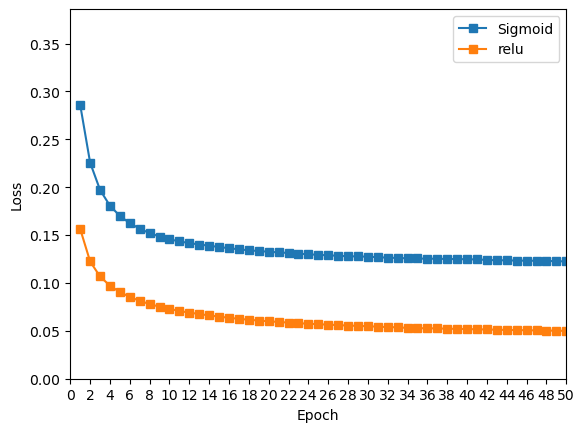

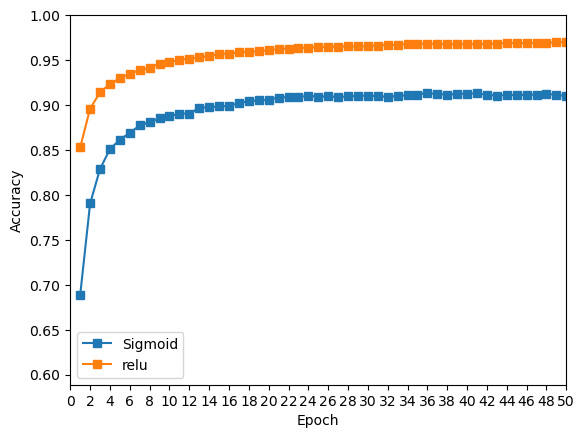

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

### TODO
执行以下代码之前，请完成 **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [15]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### 训练

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][50]	 Batch [0][429]	 Training Loss 2.7388	 Accuracy 0.0547
Epoch [0][50]	 Batch [50][429]	 Training Loss 2.3501	 Accuracy 0.1435
Epoch [0][50]	 Batch [100][429]	 Training Loss 2.2828	 Accuracy 0.2188
Epoch [0][50]	 Batch [150][429]	 Training Loss 2.2465	 Accuracy 0.2775
Epoch [0][50]	 Batch [200][429]	 Training Loss 2.2182	 Accuracy 0.3259
Epoch [0][50]	 Batch [250][429]	 Training Loss 2.1958	 Accuracy 0.3590
Epoch [0][50]	 Batch [300][429]	 Training Loss 2.1738	 Accuracy 0.3937
Epoch [0][50]	 Batch [350][429]	 Training Loss 2.1535	 Accuracy 0.4241
Epoch [0][50]	 Batch [400][429]	 Training Loss 2.1340	 Accuracy 0.4490

Epoch [0]	 Average training loss 2.1228	 Average training accuracy 0.4634
Epoch [0]	 Average validation loss 1.9392	 Average validation accuracy 0.6975

Epoch [1][50]	 Batch [0][429]	 Training Loss 2.0064	 Accuracy 0.5156
Epoch [1][50]	 Batch [50][429]	 Training Loss 1.9350	 Accuracy 0.6723
Epoch [1][50]	 Batch [100][429]	 Training Loss 1.9228	 Accuracy 0.6641


Epoch [10][50]	 Batch [250][429]	 Training Loss 1.0740	 Accuracy 0.8133
Epoch [10][50]	 Batch [300][429]	 Training Loss 1.0774	 Accuracy 0.8128
Epoch [10][50]	 Batch [350][429]	 Training Loss 1.0765	 Accuracy 0.8124
Epoch [10][50]	 Batch [400][429]	 Training Loss 1.0745	 Accuracy 0.8126

Epoch [10]	 Average training loss 1.0718	 Average training accuracy 0.8131
Epoch [10]	 Average validation loss 0.9721	 Average validation accuracy 0.8558

Epoch [11][50]	 Batch [0][429]	 Training Loss 1.1119	 Accuracy 0.8359
Epoch [11][50]	 Batch [50][429]	 Training Loss 1.0272	 Accuracy 0.8229
Epoch [11][50]	 Batch [100][429]	 Training Loss 1.0340	 Accuracy 0.8229
Epoch [11][50]	 Batch [150][429]	 Training Loss 1.0532	 Accuracy 0.8120
Epoch [11][50]	 Batch [200][429]	 Training Loss 1.0492	 Accuracy 0.8135
Epoch [11][50]	 Batch [250][429]	 Training Loss 1.0476	 Accuracy 0.8129
Epoch [11][50]	 Batch [300][429]	 Training Loss 1.0511	 Accuracy 0.8124
Epoch [11][50]	 Batch [350][429]	 Training Loss 1.0503	


Epoch [20]	 Average training loss 0.9175	 Average training accuracy 0.8140
Epoch [20]	 Average validation loss 0.8125	 Average validation accuracy 0.8600

Epoch [21][50]	 Batch [0][429]	 Training Loss 0.9864	 Accuracy 0.7969
Epoch [21][50]	 Batch [50][429]	 Training Loss 0.8744	 Accuracy 0.8290
Epoch [21][50]	 Batch [100][429]	 Training Loss 0.8882	 Accuracy 0.8256
Epoch [21][50]	 Batch [150][429]	 Training Loss 0.9088	 Accuracy 0.8161
Epoch [21][50]	 Batch [200][429]	 Training Loss 0.9072	 Accuracy 0.8169
Epoch [21][50]	 Batch [250][429]	 Training Loss 0.9063	 Accuracy 0.8155
Epoch [21][50]	 Batch [300][429]	 Training Loss 0.9106	 Accuracy 0.8142
Epoch [21][50]	 Batch [350][429]	 Training Loss 0.9139	 Accuracy 0.8130
Epoch [21][50]	 Batch [400][429]	 Training Loss 0.9096	 Accuracy 0.8143

Epoch [21]	 Average training loss 0.9097	 Average training accuracy 0.8139
Epoch [21]	 Average validation loss 0.8048	 Average validation accuracy 0.8614

Epoch [22][50]	 Batch [0][429]	 Training Lo

Epoch [31][50]	 Batch [50][429]	 Training Loss 0.8321	 Accuracy 0.8249
Epoch [31][50]	 Batch [100][429]	 Training Loss 0.8386	 Accuracy 0.8235
Epoch [31][50]	 Batch [150][429]	 Training Loss 0.8574	 Accuracy 0.8172
Epoch [31][50]	 Batch [200][429]	 Training Loss 0.8589	 Accuracy 0.8162
Epoch [31][50]	 Batch [250][429]	 Training Loss 0.8558	 Accuracy 0.8160
Epoch [31][50]	 Batch [300][429]	 Training Loss 0.8624	 Accuracy 0.8128
Epoch [31][50]	 Batch [350][429]	 Training Loss 0.8638	 Accuracy 0.8131
Epoch [31][50]	 Batch [400][429]	 Training Loss 0.8611	 Accuracy 0.8136

Epoch [31]	 Average training loss 0.8620	 Average training accuracy 0.8129
Epoch [31]	 Average validation loss 0.7540	 Average validation accuracy 0.8582

Epoch [32][50]	 Batch [0][429]	 Training Loss 0.8740	 Accuracy 0.8359
Epoch [32][50]	 Batch [50][429]	 Training Loss 0.8308	 Accuracy 0.8255
Epoch [32][50]	 Batch [100][429]	 Training Loss 0.8368	 Accuracy 0.8235
Epoch [32][50]	 Batch [150][429]	 Training Loss 0.8555	 

Epoch [41][50]	 Batch [250][429]	 Training Loss 0.8357	 Accuracy 0.8135
Epoch [41][50]	 Batch [300][429]	 Training Loss 0.8415	 Accuracy 0.8107
Epoch [41][50]	 Batch [350][429]	 Training Loss 0.8423	 Accuracy 0.8111
Epoch [41][50]	 Batch [400][429]	 Training Loss 0.8426	 Accuracy 0.8114

Epoch [41]	 Average training loss 0.8437	 Average training accuracy 0.8110
Epoch [41]	 Average validation loss 0.7348	 Average validation accuracy 0.8590

Epoch [42][50]	 Batch [0][429]	 Training Loss 0.7297	 Accuracy 0.8359
Epoch [42][50]	 Batch [50][429]	 Training Loss 0.8155	 Accuracy 0.8202
Epoch [42][50]	 Batch [100][429]	 Training Loss 0.8211	 Accuracy 0.8203
Epoch [42][50]	 Batch [150][429]	 Training Loss 0.8341	 Accuracy 0.8147
Epoch [42][50]	 Batch [200][429]	 Training Loss 0.8343	 Accuracy 0.8140
Epoch [42][50]	 Batch [250][429]	 Training Loss 0.8347	 Accuracy 0.8130
Epoch [42][50]	 Batch [300][429]	 Training Loss 0.8401	 Accuracy 0.8103
Epoch [42][50]	 Batch [350][429]	 Training Loss 0.8408	

### 测试

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8215.



## 2.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [18]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][50]	 Batch [0][429]	 Training Loss 2.4462	 Accuracy 0.0703
Epoch [0][50]	 Batch [50][429]	 Training Loss 2.1443	 Accuracy 0.2600
Epoch [0][50]	 Batch [100][429]	 Training Loss 1.8819	 Accuracy 0.4253
Epoch [0][50]	 Batch [150][429]	 Training Loss 1.6924	 Accuracy 0.5126
Epoch [0][50]	 Batch [200][429]	 Training Loss 1.5210	 Accuracy 0.5787
Epoch [0][50]	 Batch [250][429]	 Training Loss 1.4002	 Accuracy 0.6208
Epoch [0][50]	 Batch [300][429]	 Training Loss 1.2983	 Accuracy 0.6524
Epoch [0][50]	 Batch [350][429]	 Training Loss 1.2161	 Accuracy 0.6770
Epoch [0][50]	 Batch [400][429]	 Training Loss 1.1481	 Accuracy 0.6963

Epoch [0]	 Average training loss 1.1121	 Average training accuracy 0.7066
Epoch [0]	 Average validation loss 0.5220	 Average validation accuracy 0.8844

Epoch [1][50]	 Batch [0][429]	 Training Loss 0.8465	 Accuracy 0.7344
Epoch [1][50]	 Batch [50][429]	 Training Loss 0.5638	 Accuracy 0.8581
Epoch [1][50]	 Batch [100][429]	 Training Loss 0.5644	 Accuracy 0.8567


Epoch [10][50]	 Batch [250][429]	 Training Loss 0.2908	 Accuracy 0.9218
Epoch [10][50]	 Batch [300][429]	 Training Loss 0.2916	 Accuracy 0.9211
Epoch [10][50]	 Batch [350][429]	 Training Loss 0.2914	 Accuracy 0.9212
Epoch [10][50]	 Batch [400][429]	 Training Loss 0.2940	 Accuracy 0.9203

Epoch [10]	 Average training loss 0.2936	 Average training accuracy 0.9204
Epoch [10]	 Average validation loss 0.2288	 Average validation accuracy 0.9411

Epoch [11][50]	 Batch [0][429]	 Training Loss 0.2684	 Accuracy 0.9297
Epoch [11][50]	 Batch [50][429]	 Training Loss 0.2683	 Accuracy 0.9280
Epoch [11][50]	 Batch [100][429]	 Training Loss 0.2744	 Accuracy 0.9263
Epoch [11][50]	 Batch [150][429]	 Training Loss 0.2855	 Accuracy 0.9224
Epoch [11][50]	 Batch [200][429]	 Training Loss 0.2822	 Accuracy 0.9235
Epoch [11][50]	 Batch [250][429]	 Training Loss 0.2851	 Accuracy 0.9230
Epoch [11][50]	 Batch [300][429]	 Training Loss 0.2862	 Accuracy 0.9225
Epoch [11][50]	 Batch [350][429]	 Training Loss 0.2860	

Epoch [21][50]	 Batch [50][429]	 Training Loss 0.2361	 Accuracy 0.9396
Epoch [21][50]	 Batch [100][429]	 Training Loss 0.2405	 Accuracy 0.9376
Epoch [21][50]	 Batch [150][429]	 Training Loss 0.2505	 Accuracy 0.9331
Epoch [21][50]	 Batch [200][429]	 Training Loss 0.2478	 Accuracy 0.9339
Epoch [21][50]	 Batch [250][429]	 Training Loss 0.2500	 Accuracy 0.9338
Epoch [21][50]	 Batch [300][429]	 Training Loss 0.2505	 Accuracy 0.9335
Epoch [21][50]	 Batch [350][429]	 Training Loss 0.2526	 Accuracy 0.9327
Epoch [21][50]	 Batch [400][429]	 Training Loss 0.2525	 Accuracy 0.9324

Epoch [21]	 Average training loss 0.2545	 Average training accuracy 0.9318
Epoch [21]	 Average validation loss 0.2030	 Average validation accuracy 0.9485

Epoch [22][50]	 Batch [0][429]	 Training Loss 0.2231	 Accuracy 0.9453
Epoch [22][50]	 Batch [50][429]	 Training Loss 0.2329	 Accuracy 0.9403
Epoch [22][50]	 Batch [100][429]	 Training Loss 0.2378	 Accuracy 0.9380
Epoch [22][50]	 Batch [150][429]	 Training Loss 0.2477	 

Epoch [31][50]	 Batch [200][429]	 Training Loss 0.2315	 Accuracy 0.9397
Epoch [31][50]	 Batch [250][429]	 Training Loss 0.2318	 Accuracy 0.9394
Epoch [31][50]	 Batch [300][429]	 Training Loss 0.2337	 Accuracy 0.9388
Epoch [31][50]	 Batch [350][429]	 Training Loss 0.2344	 Accuracy 0.9383
Epoch [31][50]	 Batch [400][429]	 Training Loss 0.2349	 Accuracy 0.9381

Epoch [31]	 Average training loss 0.2364	 Average training accuracy 0.9377
Epoch [31]	 Average validation loss 0.1889	 Average validation accuracy 0.9535

Epoch [32][50]	 Batch [0][429]	 Training Loss 0.2412	 Accuracy 0.9453
Epoch [32][50]	 Batch [50][429]	 Training Loss 0.2277	 Accuracy 0.9419
Epoch [32][50]	 Batch [100][429]	 Training Loss 0.2275	 Accuracy 0.9413
Epoch [32][50]	 Batch [150][429]	 Training Loss 0.2319	 Accuracy 0.9389
Epoch [32][50]	 Batch [200][429]	 Training Loss 0.2307	 Accuracy 0.9399
Epoch [32][50]	 Batch [250][429]	 Training Loss 0.2303	 Accuracy 0.9399
Epoch [32][50]	 Batch [300][429]	 Training Loss 0.2325	

Epoch [41][50]	 Batch [350][429]	 Training Loss 0.2219	 Accuracy 0.9421
Epoch [41][50]	 Batch [400][429]	 Training Loss 0.2238	 Accuracy 0.9415

Epoch [41]	 Average training loss 0.2248	 Average training accuracy 0.9412
Epoch [41]	 Average validation loss 0.1813	 Average validation accuracy 0.9565

Epoch [42][50]	 Batch [0][429]	 Training Loss 0.1535	 Accuracy 0.9453
Epoch [42][50]	 Batch [50][429]	 Training Loss 0.2189	 Accuracy 0.9442
Epoch [42][50]	 Batch [100][429]	 Training Loss 0.2173	 Accuracy 0.9441
Epoch [42][50]	 Batch [150][429]	 Training Loss 0.2203	 Accuracy 0.9423
Epoch [42][50]	 Batch [200][429]	 Training Loss 0.2185	 Accuracy 0.9436
Epoch [42][50]	 Batch [250][429]	 Training Loss 0.2189	 Accuracy 0.9432
Epoch [42][50]	 Batch [300][429]	 Training Loss 0.2213	 Accuracy 0.9424
Epoch [42][50]	 Batch [350][429]	 Training Loss 0.2207	 Accuracy 0.9426
Epoch [42][50]	 Batch [400][429]	 Training Loss 0.2228	 Accuracy 0.9419

Epoch [42]	 Average training loss 0.2237	 Average trai

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9453.



## 绘制曲线

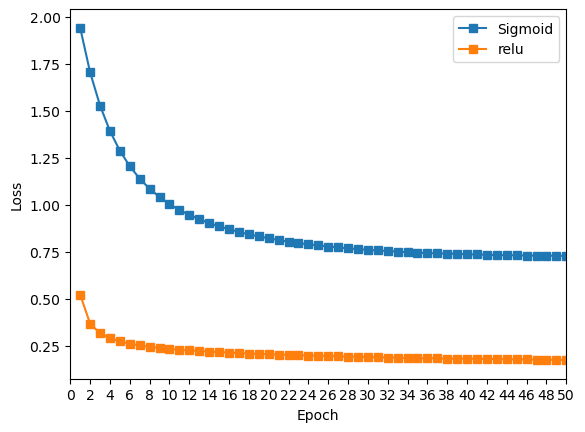

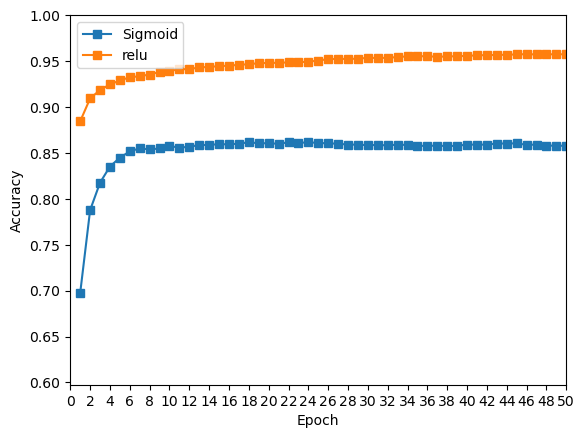

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 具有两层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.2465	 Accuracy 0.1500
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.2872	 Accuracy 0.1588
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.2621	 Accuracy 0.1792
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.2419	 Accuracy 0.1934
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.2237	 Accuracy 0.2081
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.2056	 Accuracy 0.2222
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.1871	 Accuracy 0.2369
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.1683	 Accuracy 0.2511
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.1460	 Accuracy 0.2673
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.1264	 Accuracy 0.2816
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.1058	 Accuracy 0.2964

Epoch [0]	 Average training loss 2.0845	 Average training accuracy 0.3119
Epoch [0]	 Average validation loss 1.8223	 Average validation accuracy 0.4938

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.7618	 Accuracy 0.5300

Epoch [9][20]	 Batch [100][550]	 Training Loss 0.5716	 Accuracy 0.8596
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.5782	 Accuracy 0.8560
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.5799	 Accuracy 0.8554
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.5759	 Accuracy 0.8562
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.5747	 Accuracy 0.8565
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.5790	 Accuracy 0.8550
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.5778	 Accuracy 0.8555
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.5776	 Accuracy 0.8554
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.5779	 Accuracy 0.8548

Epoch [9]	 Average training loss 0.5761	 Average training accuracy 0.8549
Epoch [9]	 Average validation loss 0.4727	 Average validation accuracy 0.8954

Epoch [10][20]	 Batch [0][550]	 Training Loss 0.5081	 Accuracy 0.8700
Epoch [10][20]	 Batch [50][550]	 Training Loss 0.5372	 Accuracy 0.8667
Epoch [10][20]	 Batch [100][550]	 Training Loss 0.5448	 Accuracy 0


Epoch [17]	 Average training loss 0.4548	 Average training accuracy 0.8810
Epoch [17]	 Average validation loss 0.3660	 Average validation accuracy 0.9142

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.4103	 Accuracy 0.9100
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.4233	 Accuracy 0.8933
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.4338	 Accuracy 0.8892
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.4420	 Accuracy 0.8860
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.4434	 Accuracy 0.8858
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.4408	 Accuracy 0.8861
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.4411	 Accuracy 0.8854
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.4453	 Accuracy 0.8838
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.4453	 Accuracy 0.8837
Epoch [18][20]	 Batch [450][550]	 Training Loss 0.4458	 Accuracy 0.8837
Epoch [18][20]	 Batch [500][550]	 Training Loss 0.4472	 Accuracy 0.8827

Epoch [18]	 Average training loss 0.4467	 Average trai

Epoch [6][20]	 Batch [450][550]	 Training Loss 0.5444	 Accuracy 0.8511
Epoch [6][20]	 Batch [500][550]	 Training Loss 0.5444	 Accuracy 0.8506

Epoch [6]	 Average training loss 0.5416	 Average training accuracy 0.8515
Epoch [6]	 Average validation loss 0.4209	 Average validation accuracy 0.8944

Epoch [7][20]	 Batch [0][550]	 Training Loss 0.4607	 Accuracy 0.9000
Epoch [7][20]	 Batch [50][550]	 Training Loss 0.4903	 Accuracy 0.8716
Epoch [7][20]	 Batch [100][550]	 Training Loss 0.4977	 Accuracy 0.8667
Epoch [7][20]	 Batch [150][550]	 Training Loss 0.5083	 Accuracy 0.8609
Epoch [7][20]	 Batch [200][550]	 Training Loss 0.5081	 Accuracy 0.8605
Epoch [7][20]	 Batch [250][550]	 Training Loss 0.5048	 Accuracy 0.8621
Epoch [7][20]	 Batch [300][550]	 Training Loss 0.5029	 Accuracy 0.8625
Epoch [7][20]	 Batch [350][550]	 Training Loss 0.5074	 Accuracy 0.8606
Epoch [7][20]	 Batch [400][550]	 Training Loss 0.5063	 Accuracy 0.8611
Epoch [7][20]	 Batch [450][550]	 Training Loss 0.5068	 Accuracy 0.86

Epoch [15][20]	 Batch [350][550]	 Training Loss 0.3810	 Accuracy 0.8954
Epoch [15][20]	 Batch [400][550]	 Training Loss 0.3808	 Accuracy 0.8954
Epoch [15][20]	 Batch [450][550]	 Training Loss 0.3819	 Accuracy 0.8946
Epoch [15][20]	 Batch [500][550]	 Training Loss 0.3833	 Accuracy 0.8940

Epoch [15]	 Average training loss 0.3828	 Average training accuracy 0.8940
Epoch [15]	 Average validation loss 0.2961	 Average validation accuracy 0.9220

Epoch [16][20]	 Batch [0][550]	 Training Loss 0.3360	 Accuracy 0.9300
Epoch [16][20]	 Batch [50][550]	 Training Loss 0.3507	 Accuracy 0.9080
Epoch [16][20]	 Batch [100][550]	 Training Loss 0.3599	 Accuracy 0.9040
Epoch [16][20]	 Batch [150][550]	 Training Loss 0.3710	 Accuracy 0.8993
Epoch [16][20]	 Batch [200][550]	 Training Loss 0.3705	 Accuracy 0.8992
Epoch [16][20]	 Batch [250][550]	 Training Loss 0.3691	 Accuracy 0.9002
Epoch [16][20]	 Batch [300][550]	 Training Loss 0.3693	 Accuracy 0.8991
Epoch [16][20]	 Batch [350][550]	 Training Loss 0.3735	

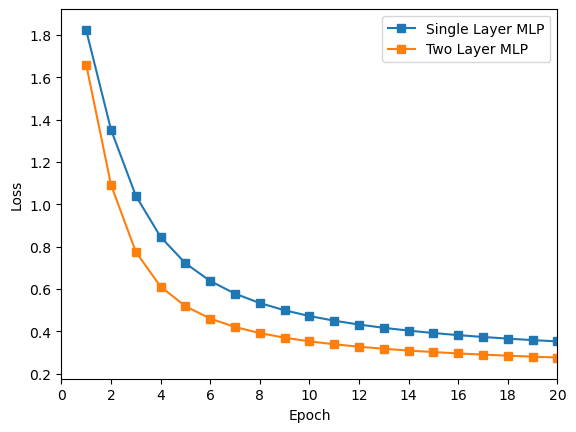

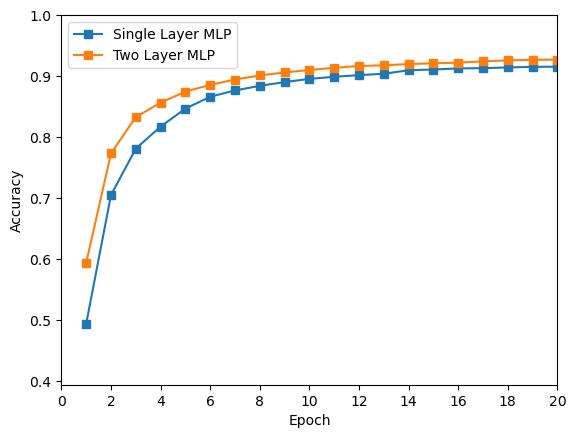

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD
from layers import FCLayer, ReLULayer, SigmoidLayer

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 数据预处理函数
def decode_image(image):
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    return tf.one_hot(label, depth=10)

x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

batch_size = 128
max_epoch = 50
init_std = 0.02
learning_rate_SGD = 0.01
weight_decay = 0.005
disp_freq = 50

# 创建单层隐含层的MLP
single_layer_mlp = Network()
single_layer_mlp.add(FCLayer(784, 128))  # 第一个隐含层
single_layer_mlp.add(ReLULayer())        # 第一个隐含层的激活函数
single_layer_mlp.add(FCLayer(128, 10))   # 输出层
single_layer_mlp, single_layer_loss, single_layer_acc = train(single_layer_mlp, SoftmaxCrossEntropyLossLayer(), SGD(learning_rate_SGD, weight_decay), data_train, max_epoch, batch_size, disp_freq)
test(single_layer_mlp, SoftmaxCrossEntropyLossLayer(), data_test, batch_size, disp_freq)

# 创建具有两个隐含层的MLP
two_layer_mlp = Network()
two_layer_mlp.add(FCLayer(784, 128))    # 第一个隐含层
two_layer_mlp.add(ReLULayer())          # 第一个隐含层的激活函数
two_layer_mlp.add(FCLayer(128, 64))     # 第二个隐含层
two_layer_mlp.add(ReLULayer())          # 第二个隐含层的激活函数
two_layer_mlp.add(FCLayer(64, 10))      # 输出层
two_layer_mlp, two_layer_loss, two_layer_acc = train(two_layer_mlp, SoftmaxCrossEntropyLossLayer(), SGD(learning_rate_SGD, weight_decay), data_train, max_epoch, batch_size, disp_freq)
test(two_layer_mlp, SoftmaxCrossEntropyLossLayer(), data_test, batch_size, disp_freq)

# 绘制损失和准确率曲线以进行比较
plot_loss_and_acc({'Single Layer MLP': [single_layer_loss, single_layer_acc],
                   'Two Layer MLP': [two_layer_loss, two_layer_acc]})

In [ ]:
收敛速度上 & 训练的准确率上，多隐含层的网络结构有着更好的表现